### 做图像压缩

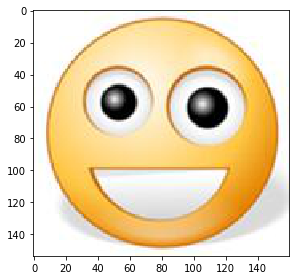

In [7]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

image=io.imread("test2.jpg")
io.imshow(image)
io.show()

In [8]:
#计算出多少行多少列、也就是有多少个像素点
rows=image.shape[0]
cols=image.shape[1]

#图像重塑（原来是像素点r*w*c）,c为3个颜色通道
image = image.reshape(image.shape[0]*image.shape[1],3)
#n_clusters对颜色压缩（由256到128）
kmeans=KMeans(n_clusters=128,n_init=10,max_iter=200)
kmeans.fit(image)

clusters=np.asarray(kmeans.cluster_centers_,dtype=np.uint8)
labels = np.asarray(kmeans.labels_,dtype=np.uint8 ) 
#reshape重新组织为图像
labels = labels.reshape(rows,cols)

print (clusters.shape)
np.save('codebook_test.npy',clusters)    
io.imsave('compressed_test.jpg',labels)

(128, 3)
